# CA1 REGRESSION

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("pc_data.csv", sep= ',')

## Data Exploration

In [3]:
df.head(10)

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,1065.60000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,5700.88008
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,3086.77680
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,3982.68000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,2051.28000


In [4]:
df.shape

(15320, 12)

In [5]:
df.dtypes

Product ID            int64
Brand                object
Type                 object
Screen Size         float64
Screen Specs         object
CPU                  object
RAM                  object
Hard Disk            object
GPU                  object
Operating System     object
Weight               object
Price ($)           float64
dtype: object

In [6]:
# we can see that there a lot of columns with datatype 'object' needs to be changed since it is neither integer or float

In [7]:
df.count()

Product ID          15320
Brand               15320
Type                15320
Screen Size         15320
Screen Specs        15320
CPU                 15320
RAM                 15320
Hard Disk           15320
GPU                 15320
Operating System    15320
Weight              15320
Price ($)           15320
dtype: int64

In [8]:
# All the rows have no missing values

## Data Cleaning

In [9]:
# dropping product id because it is not needed

In [10]:
df2 = df.drop('Product ID',axis = 1)
df2.head(2)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616


In [11]:
df2.isna().sum()

Brand               0
Type                0
Screen Size         0
Screen Specs        0
CPU                 0
RAM                 0
Hard Disk           0
GPU                 0
Operating System    0
Weight              0
Price ($)           0
dtype: int64

In [12]:
# There are no null rows in this dataset

## Feature Engineering

### Weight

In [13]:
# I'm splitting weight and then dropping the unit column so that I only retain the number

In [14]:
df2[['weight', 'unit']] = df['Weight'].str.split('kg', expand=True)

In [15]:
df2 = df2.drop("unit", axis= 1)
df2.head(3)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($),weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000,1.86


In [16]:
# I then drop the weight column because it is no longer needed

In [17]:
df2 = df2.drop("Weight", axis= 1)

In [18]:
# here I am changing the datatype of the weight to float32 because it is still a string

In [19]:
df2['weight'] = df2['weight'].astype('float32')

In [20]:
# I'll be splitting gpu into 5 columns and then dropping the other 4 to retain only the gpu brand

### GPU

In [21]:
df2[['gpu brand','gpuspecs1','gpuspecs2','gpuspecs3','gpuspecs4']] = df2['GPU'].str.split(' ',expand = True)
df2.head(2)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Price ($),weight,gpu brand,gpuspecs1,gpuspecs2,gpuspecs3,gpuspecs4
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,3568.93416,1.37,Intel,Iris,Plus,Graphics,640
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,2394.77616,1.34,Intel,HD,Graphics,6000,None


In [22]:
df2 = df2.drop(['gpuspecs1','gpuspecs2','gpuspecs3','gpuspecs4'], axis =1)
df2 = df2.drop('GPU', axis = 1)

In [23]:
df2.head(2)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,Operating System,Price ($),weight,gpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,3568.93416,1.37,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,2394.77616,1.34,Intel


In [24]:
df2['gpu brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [25]:
# assigning a number to each type of grpu brand and then converting it to numeral datatype using pd.to_numeric

In [26]:
df2.loc[df2['gpu brand'] == 'Intel', 'gpu brand'] = 1
df2.loc[df2['gpu brand'] == 'AMD', 'gpu brand'] = 2
df2.loc[df2['gpu brand'] == 'Nvidia', 'gpu brand'] = 3
df2.loc[df2['gpu brand'] == 'ARM', 'gpu brand'] = 4

In [27]:
df2['gpu brand'] = df2['gpu brand'].apply(pd.to_numeric)

In [28]:
df2.head(4) 

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,Operating System,Price ($),weight,gpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,3568.93416,1.37,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,2394.77616,1.34,1
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1531.80000,1.86,1
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,6759.76680,1.83,2


### Screen Specs

In [29]:
#  I extracted the screen dimension from Screen Specs

In [30]:
df2['Screen dimension'] = df2['Screen Specs'].str.extract(r'(\d\d\d\dx\d\d\d\d?)')
df2.head(3)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,Operating System,Price ($),weight,gpu brand,Screen dimension
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,3568.93416,1.37,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,2394.77616,1.34,1,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1531.80000,1.86,1,1920x1080


In [31]:
# I then further splitted the screen dimension to obtain a x and y resolution afterwhich I had to change the datatype also 
# because it is still a string

In [32]:
df2[['x_res','y_res']] = df2['Screen dimension'].str.split('x', expand = True)

In [33]:
df2['x_res'] = df2['x_res'].apply(pd.to_numeric)
df2['y_res'] = df2['y_res'].apply(pd.to_numeric)

In [34]:
# I dropped screen dimension because I no longer need it 

In [35]:
df2 = df2.drop('Screen dimension', axis=1)

In [36]:
df2.head(3)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,3568.93416,1.37,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,2394.77616,1.34,1,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1531.80000,1.86,1,1920,1080


In [37]:
# Based on logical thinking, one can assume that whether the screen is touchscreen or not will obviously predict the price
# I also think that IPS panel display will affect the price and thus I made 2 new columns and did hot encoding. 

In [38]:
df2['Touchscreen'] = df2['Screen Specs'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df2['IPS'] = df2['Screen Specs'].apply(lambda x:1 if 'IPS' in x else 0)

In [39]:
df2.head(2)

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,3568.93416,1.37,1,2560,1600,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,2394.77616,1.34,1,1440,900,0,0


In [40]:
# I dropped the screen specs because I no longer need it 

In [41]:
df2 = df2.drop('Screen Specs', axis = 1)
df2.head(3)

,Brand,Type,Screen Size,CPU,RAM,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,3568.93416,1.37,1,2560,1600,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,2394.77616,1.34,1,1440,900,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1531.80000,1.86,1,1920,1080,0,0


### RAM

In [44]:
# I splitted the RAM column into 2  and then dropped the unit column so that I only retain the number

In [45]:
df2[['RAM(GB)', 'unit']] = df['RAM'].str.split('GB', expand=True)

In [46]:
df2 = df2.drop('unit',axis = 1)

In [47]:
# I also dropped the RAM column because I no longer need it 

In [48]:
df2 = df2.drop('RAM', axis = 1)

In [49]:
# I changed the datatype to integer as it was still a string

In [50]:
df2['RAM(GB)'] = df2['RAM(GB)'].astype('int32')

In [51]:
df2.head(2)

,Brand,Type,Screen Size,CPU,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB)
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,macOS,3568.93416,1.37,1,2560,1600,0,1,8
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,macOS,2394.77616,1.34,1,1440,900,0,0,8


### TYPE

In [52]:
# I assigned a number to each type of computer so that the data will now be numbers and not words

In [53]:
df2['Type'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [54]:
df2.loc[df2['Type'] == 'Ultrabook', 'Type'] = 1
df2.loc[df2['Type'] == 'Notebook', 'Type']= 2
df2.loc[df2['Type'] == 'Netbook', 'Type'] = 3
df2.loc[df2['Type'] == 'Gaming', 'Type'] = 4
df2.loc[df2['Type'] == '2 in 1 Convertible', 'Type'] = 5
df2.loc[df2['Type'] == 'Workstation', 'Type'] = 6

In [55]:
df2[41:45]

,Brand,Type,Screen Size,CPU,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB)
41,Dell,4,15.6,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1TB HDD,Windows 10,3993.33600,2.65,3,1920,1080,0,1,16
42,Asus,2,15.6,Intel Core i5 7200U 2.5GHz,1TB HDD,Linux,1393.24536,2.30,3,1366,768,0,0,8
43,Acer,2,15.6,Intel Core i5 8250U 1.6GHz,256GB SSD,Windows 10,1816.84800,2.20,1,1920,1080,0,1,4
44,Dell,5,17.3,Intel Core i5 8250U 1.6GHz,1TB HDD,Windows 10,2661.33600,2.77,3,1920,1080,1,0,12


In [56]:
df2['Type'] = df2['Type'].apply(pd.to_numeric)

### BRAND

In [57]:
df2['Brand'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [58]:
# This was an exhausting step where I had to assign each brand to a number

In [59]:
df2.loc[df2['Brand'] == 'Apple', 'Brand'] = 1   
df2.loc[df2['Brand'] == 'HP', 'Brand'] = 2
df2.loc[df2['Brand'] == 'Acer', 'Brand'] = 3
df2.loc[df2['Brand'] == 'Asus', 'Brand'] = 4
df2.loc[df2['Brand'] == 'Dell', 'Brand'] = 5
df2.loc[df2['Brand'] == 'Lenovo', 'Brand'] = 6
df2.loc[df2['Brand'] == 'Chuwi', 'Brand'] = 7
df2.loc[df2['Brand'] == 'MSI', 'Brand'] = 8
df2.loc[df2['Brand'] == 'Microsoft', 'Brand'] = 9
df2.loc[df2['Brand'] == 'Toshiba', 'Brand'] = 10
df2.loc[df2['Brand'] == 'Huawei', 'Brand'] = 11
df2.loc[df2['Brand'] == 'Xiaomi', 'Brand'] = 12
df2.loc[df2['Brand'] == 'Vero', 'Brand'] = 13
df2.loc[df2['Brand'] == 'Razer', 'Brand'] = 14
df2.loc[df2['Brand'] == 'Mediacom', 'Brand'] = 15
df2.loc[df2['Brand'] == 'Samsung', 'Brand'] = 16
df2.loc[df2['Brand'] == 'Google', 'Brand'] = 17
df2.loc[df2['Brand'] == 'Fujitsu', 'Brand'] = 18
df2.loc[df2['Brand'] == 'LG', 'Brand'] = 19

In [60]:
df2[20:28]

,Brand,Type,Screen Size,CPU,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB)
20,4,3,11.6,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage,Windows 10,511.22160,0.98,1,1366,768,0,0,2
21,6,4,15.6,Intel Core i5 7300HQ 2.5GHz,128GB SSD + 1TB HDD,Windows 10,2661.33600,2.50,3,1920,1080,0,1,8
22,2,2,15.6,AMD E-Series E2-9000e 1.5GHz,500GB HDD,No OS,687.31200,1.86,2,1366,768,0,0,4
23,5,5,13.3,Intel Core i5 8250U 1.6GHz,256GB SSD,Windows 10,2181.81600,1.62,1,1920,1080,1,0,8
24,2,1,15.6,Intel Core i7 8550U 1.8GHz,256GB SSD,Windows 10,1755.57600,1.91,1,1920,1080,0,0,8
25,5,2,15.6,Intel Core i3 6006U 2GHz,1TB HDD,Windows 10,1115.25696,2.30,1,1366,768,0,0,4
26,1,1,13.3,Intel Core i5 1.6GHz,128GB Flash Storage,Mac OS X,2927.73600,1.35,1,1440,900,0,0,8
27,5,2,15.6,Intel Core i5 8250U 1.6GHz,256GB SSD,Windows 10,2131.20000,2.20,2,1920,1080,0,0,8


In [61]:
df2['Brand'] = df2['Brand'].apply(pd.to_numeric)

### OPERATING SYSTEM

In [62]:
df2['Operating System'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [63]:
# I assigned each operating system  a number

In [64]:
df2.loc[df2['Operating System'] == 'macOS', 'Operating System'] = 1
df2.loc[df2['Operating System'] == 'No OS', 'Operating System'] = 2
df2.loc[df2['Operating System'] == 'Windows 10', 'Operating System'] = 3
df2.loc[df2['Operating System'] == 'Mac OS X', 'Operating System'] = 4
df2.loc[df2['Operating System'] == 'Linux', 'Operating System'] = 5
df2.loc[df2['Operating System'] == 'Android', 'Operating System'] = 6
df2.loc[df2['Operating System'] == 'Windows 10 S', 'Operating System'] = 7
df2.loc[df2['Operating System'] == 'Chrome OS', 'Operating System'] = 8
df2.loc[df2['Operating System'] == 'Windows 7', 'Operating System'] = 9

In [65]:
# changing datatype to integer

In [66]:
df2['Operating System'] = df2['Operating System'].apply(pd.to_numeric)

In [67]:
df2.head(3) 

,Brand,Type,Screen Size,CPU,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB)
0,1,1,13.3,Intel Core i5 2.3GHz,128GB SSD,1,3568.93416,1.37,1,2560,1600,0,1,8
1,1,1,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,1,2394.77616,1.34,1,1440,900,0,0,8
2,2,2,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,2,1531.80000,1.86,1,1920,1080,0,0,8


### CPU

In [68]:
# I split CPU into 3 columns and dropped the other 2 as I only wanted to retain the cpu processor brand

In [69]:
df2[['cpu_brand','cpu_specs1','cpu_specs2']] = df2['CPU'].str.split('-', expand=True)

In [70]:
# I dropped CPU as well as I no longer needed it 

In [71]:
df2 = df2.drop('CPU', axis = 1)
df2 = df2.drop(['cpu_specs1','cpu_specs2'], axis = 1)

In [72]:
df2.head(3)

,Brand,Type,Screen Size,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB),cpu_brand
0,1,1,13.3,128GB SSD,1,3568.93416,1.37,1,2560,1600,0,1,8,Intel Core i5 2.3GHz
1,1,1,13.3,128GB Flash Storage,1,2394.77616,1.34,1,1440,900,0,0,8,Intel Core i5 1.8GHz
2,2,2,15.6,256GB SSD,2,1531.80000,1.86,1,1920,1080,0,0,8,Intel Core i5 7200U 2.5GHz


In [73]:
# doing hot encoding with each type of cpu brand , resulting in 4 new columns

In [74]:
df2["i7"] = df2["cpu_brand"].apply(lambda x: 1 if 'Intel Core i7' in x else 0)
df2["i5"] = df2["cpu_brand"].apply(lambda x: 1 if 'Intel Core i5' in x else 0)
df2["i3"] = df2["cpu_brand"].apply(lambda x: 1 if 'Intel Core i3' in x else 0)
df2["AMD"] = df2["cpu_brand"].apply(lambda x: 1 if 'AMD' in x else 0)

In [75]:
df2['i7'] = df2['i7'].apply(pd.to_numeric)
df2['i5'] = df2['i5'].apply(pd.to_numeric)
df2['i3'] = df2['i3'].apply(pd.to_numeric)
df2['AMD'] = df2['AMD'].apply(pd.to_numeric)

In [76]:
# dropping cpu _brand because I no longer need it

In [77]:
df2 = df2.drop('cpu_brand', axis=1)

In [78]:
df2.head(8)

,Brand,Type,Screen Size,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB),i7,i5,i3,AMD
0,1,1,13.3,128GB SSD,1,3568.93416,1.37,1,2560,1600,0,1,8,0,1,0,0
1,1,1,13.3,128GB Flash Storage,1,2394.77616,1.34,1,1440,900,0,0,8,0,1,0,0
2,2,2,15.6,256GB SSD,2,1531.80000,1.86,1,1920,1080,0,0,8,0,1,0,0
3,1,1,15.4,512GB SSD,1,6759.76680,1.83,2,2880,1800,0,1,16,1,0,0,0
4,1,1,13.3,256GB SSD,1,4804.79040,1.37,1,2560,1600,0,1,8,0,1,0,0
5,3,2,15.6,500GB HDD,3,1065.60000,2.10,2,1366,768,0,0,4,0,0,0,1
6,1,1,15.4,256GB Flash Storage,4,5700.88008,2.04,1,2880,1800,0,1,16,1,0,0,0
7,1,1,13.3,256GB Flash Storage,1,3086.77680,1.34,1,1440,900,0,0,8,0,1,0,0


### HARD DISK

In [79]:
# I had to set one common unit so I wanted to change all the valyes for TB to 1000 and I wanted to get rid of words for 
# splittig and calculation that will be carried out later

In [80]:
df2["Hard Disk"] = df2["Hard Disk"].astype(str).replace('.0', '', regex=True)
df2["Hard Disk"] = df2["Hard Disk"].str.replace('GB', '')
df2["Hard Disk"] = df2["Hard Disk"].str.replace('TB', '000')

In [81]:
df2.head(2)

,Brand,Type,Screen Size,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB),i7,i5,i3,AMD
0,1,1,13.3,128 SSD,1,3568.93416,1.37,1,2560,1600,0,1,8,0,1,0,0
1,1,1,13.3,128 Flash Storage,1,2394.77616,1.34,1,1440,900,0,0,8,0,1,0,0


In [82]:
# there is some additional storage so i had to split and this resulted in 2 new columns

In [83]:
df2[['hard disk','extra']]= df2["Hard Disk"].str.split("+", n = 1, expand = True)

In [85]:
df2.head(2)

,Brand,Type,Screen Size,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB),i7,i5,i3,AMD,hard disk,extra
0,1,1,13.3,128 SSD,1,3568.93416,1.37,1,2560,1600,0,1,8,0,1,0,0,128 SSD,None
1,1,1,13.3,128 Flash Storage,1,2394.77616,1.34,1,1440,900,0,0,8,0,1,0,0,128 Flash Storage,None


In [86]:
# not all have additional storage so i filled the null values with 0 

In [87]:
df2["extra"].fillna("0", inplace = True)

In [88]:
# created 4 new columns from the new hard disk column where I did hot encoding for each type of hard disk

In [89]:
df2["HDD"] = df2["hard disk"].apply(lambda x: 1 if "HDD" in x else 0)
df2["SSD"] = df2["hard disk"].apply(lambda x: 1 if "SSD" in x else 0)
df2["Hybrid"] = df2["hard disk"].apply(lambda x: 1 if "Hybrid" in x else 0)
df2["Flash_Storage"] = df2["hard disk"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [90]:
# taking into consideration the extra column, i did hot encoding for all the extra hard disk storage and created 4 more columns

In [91]:
df2["extraHDD"] = df2["extra"].apply(lambda x: 1 if "HDD" in x else 0)
df2["extraSSD"] = df2["extra"].apply(lambda x: 1 if "SSD" in x else 0)
df2["extraHybrid"] = df2["extra"].apply(lambda x: 1 if "Hybrid" in x else 0)
df2["extraFlash_Storage"] = df2["extra"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [92]:
df2[20:24]

,Brand,Type,Screen Size,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,...,hard disk,extra,HDD,SSD,Hybrid,Flash_Storage,extraHDD,extraSSD,extraHybrid,extraFlash_Storage
20,4,3,11.6,32 Flash Storage,3,511.2216,0.98,1,1366,768,...,32 Flash Storage,0,0,0,0,1,0,0,0,0
21,6,4,15.6,128 SSD + 1000 HDD,3,2661.3360,2.50,3,1920,1080,...,128 SSD,1000 HDD,0,1,0,0,1,0,0,0
22,2,2,15.6,0 HDD,2,687.3120,1.86,2,1366,768,...,0 HDD,0,1,0,0,0,0,0,0,0
23,5,5,13.3,256 SSD,3,2181.8160,1.62,1,1920,1080,...,256 SSD,0,0,1,0,0,0,0,0,0


In [93]:
# I then multiplied the extra storage with the default for each type of hard disk and created 4 more columns

In [94]:
df2["HDD"]=(df2["hard disk"]*df2["HDD"]+df2["extra"]*df2["extraHDD"])
df2["SSD"]=(df2["hard disk"]*df2["SSD"]+df2["extra"]*df2["extraSSD"])
df2["Hybrid"]=(df2["hard disk"]*df2["Hybrid"]+df2["extra"]*df2["extraHybrid"])
df2["Flash_Storage"]=(df2["hard disk"]*df2["Flash_Storage"]+df2["extra"]*df2["extraFlash_Storage"])

In [95]:
df2.head(3)

,Brand,Type,Screen Size,Hard Disk,Operating System,Price ($),weight,gpu brand,x_res,y_res,...,hard disk,extra,HDD,SSD,Hybrid,Flash_Storage,extraHDD,extraSSD,extraHybrid,extraFlash_Storage
0,1,1,13.3,128 SSD,1,3568.93416,1.37,1,2560,1600,...,128 SSD,0,,128 SSD,,,0,0,0,0
1,1,1,13.3,128 Flash Storage,1,2394.77616,1.34,1,1440,900,...,128 Flash Storage,0,,,,128 Flash Storage,0,0,0,0
2,2,2,15.6,256 SSD,2,1531.80000,1.86,1,1920,1080,...,256 SSD,0,,256 SSD,,,0,0,0,0


In [96]:
# I then splitted the strings in each column so that I will only obtain the number. I filled all the null values with 0

In [97]:
df2['hdd'] = df2['HDD'].apply(lambda x: x if len(x)<2 else x.split()[0])
df2['ssd'] = df2['SSD'].apply(lambda x: x if len(x)<2 else x.split()[0])
df2['hybrid'] = df2['Hybrid'].apply(lambda x: x if len(x)<2 else x.split()[0])
df2['flash_storage'] = df2['Flash_Storage'].apply(lambda x: x if len(x)<2 else x.split()[0])

In [98]:
df2['hdd'] = df2['hdd'].apply(pd.to_numeric)
df2['ssd'] = df2['ssd'].apply(pd.to_numeric)
df2['hybrid'] = df2['hybrid'].apply(pd.to_numeric)
df2['flash_storage'] = df2['flash_storage'].apply(pd.to_numeric)

In [100]:
df2["hdd"].fillna("0", inplace = True)
df2["ssd"].fillna("0", inplace = True)
df2["hybrid"].fillna("0", inplace = True)
df2["flash_storage"].fillna("0", inplace = True)

In [101]:
df2 = df2.drop(['hard disk', 'extra', 'HDD', 'SSD', 'Hybrid','Flash_Storage', 'extraHDD', 'extraSSD', 'extraHybrid',
                        'extraFlash_Storage'],axis = 1)

In [102]:
df2 = df2.drop('Hard Disk', axis=1)

In [103]:
df2.head(8)

,Brand,Type,Screen Size,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB),i7,i5,i3,AMD,hdd,ssd,hybrid,flash_storage
0,1,1,13.3,1,3568.93416,1.37,1,2560,1600,0,1,8,0,1,0,0,0,128.0,0,0
1,1,1,13.3,1,2394.77616,1.34,1,1440,900,0,0,8,0,1,0,0,0,0,0,128.0
2,2,2,15.6,2,1531.80000,1.86,1,1920,1080,0,0,8,0,1,0,0,0,256.0,0,0
3,1,1,15.4,1,6759.76680,1.83,2,2880,1800,0,1,16,1,0,0,0,0,512.0,0,0
4,1,1,13.3,1,4804.79040,1.37,1,2560,1600,0,1,8,0,1,0,0,0,256.0,0,0
5,3,2,15.6,3,1065.60000,2.10,2,1366,768,0,0,4,0,0,0,1,0.0,0,0,0
6,1,1,15.4,4,5700.88008,2.04,1,2880,1800,0,1,16,1,0,0,0,0,0,0,256.0
7,1,1,13.3,1,3086.77680,1.34,1,1440,900,0,0,8,0,1,0,0,0,0,0,256.0


## Explory Data Analysis

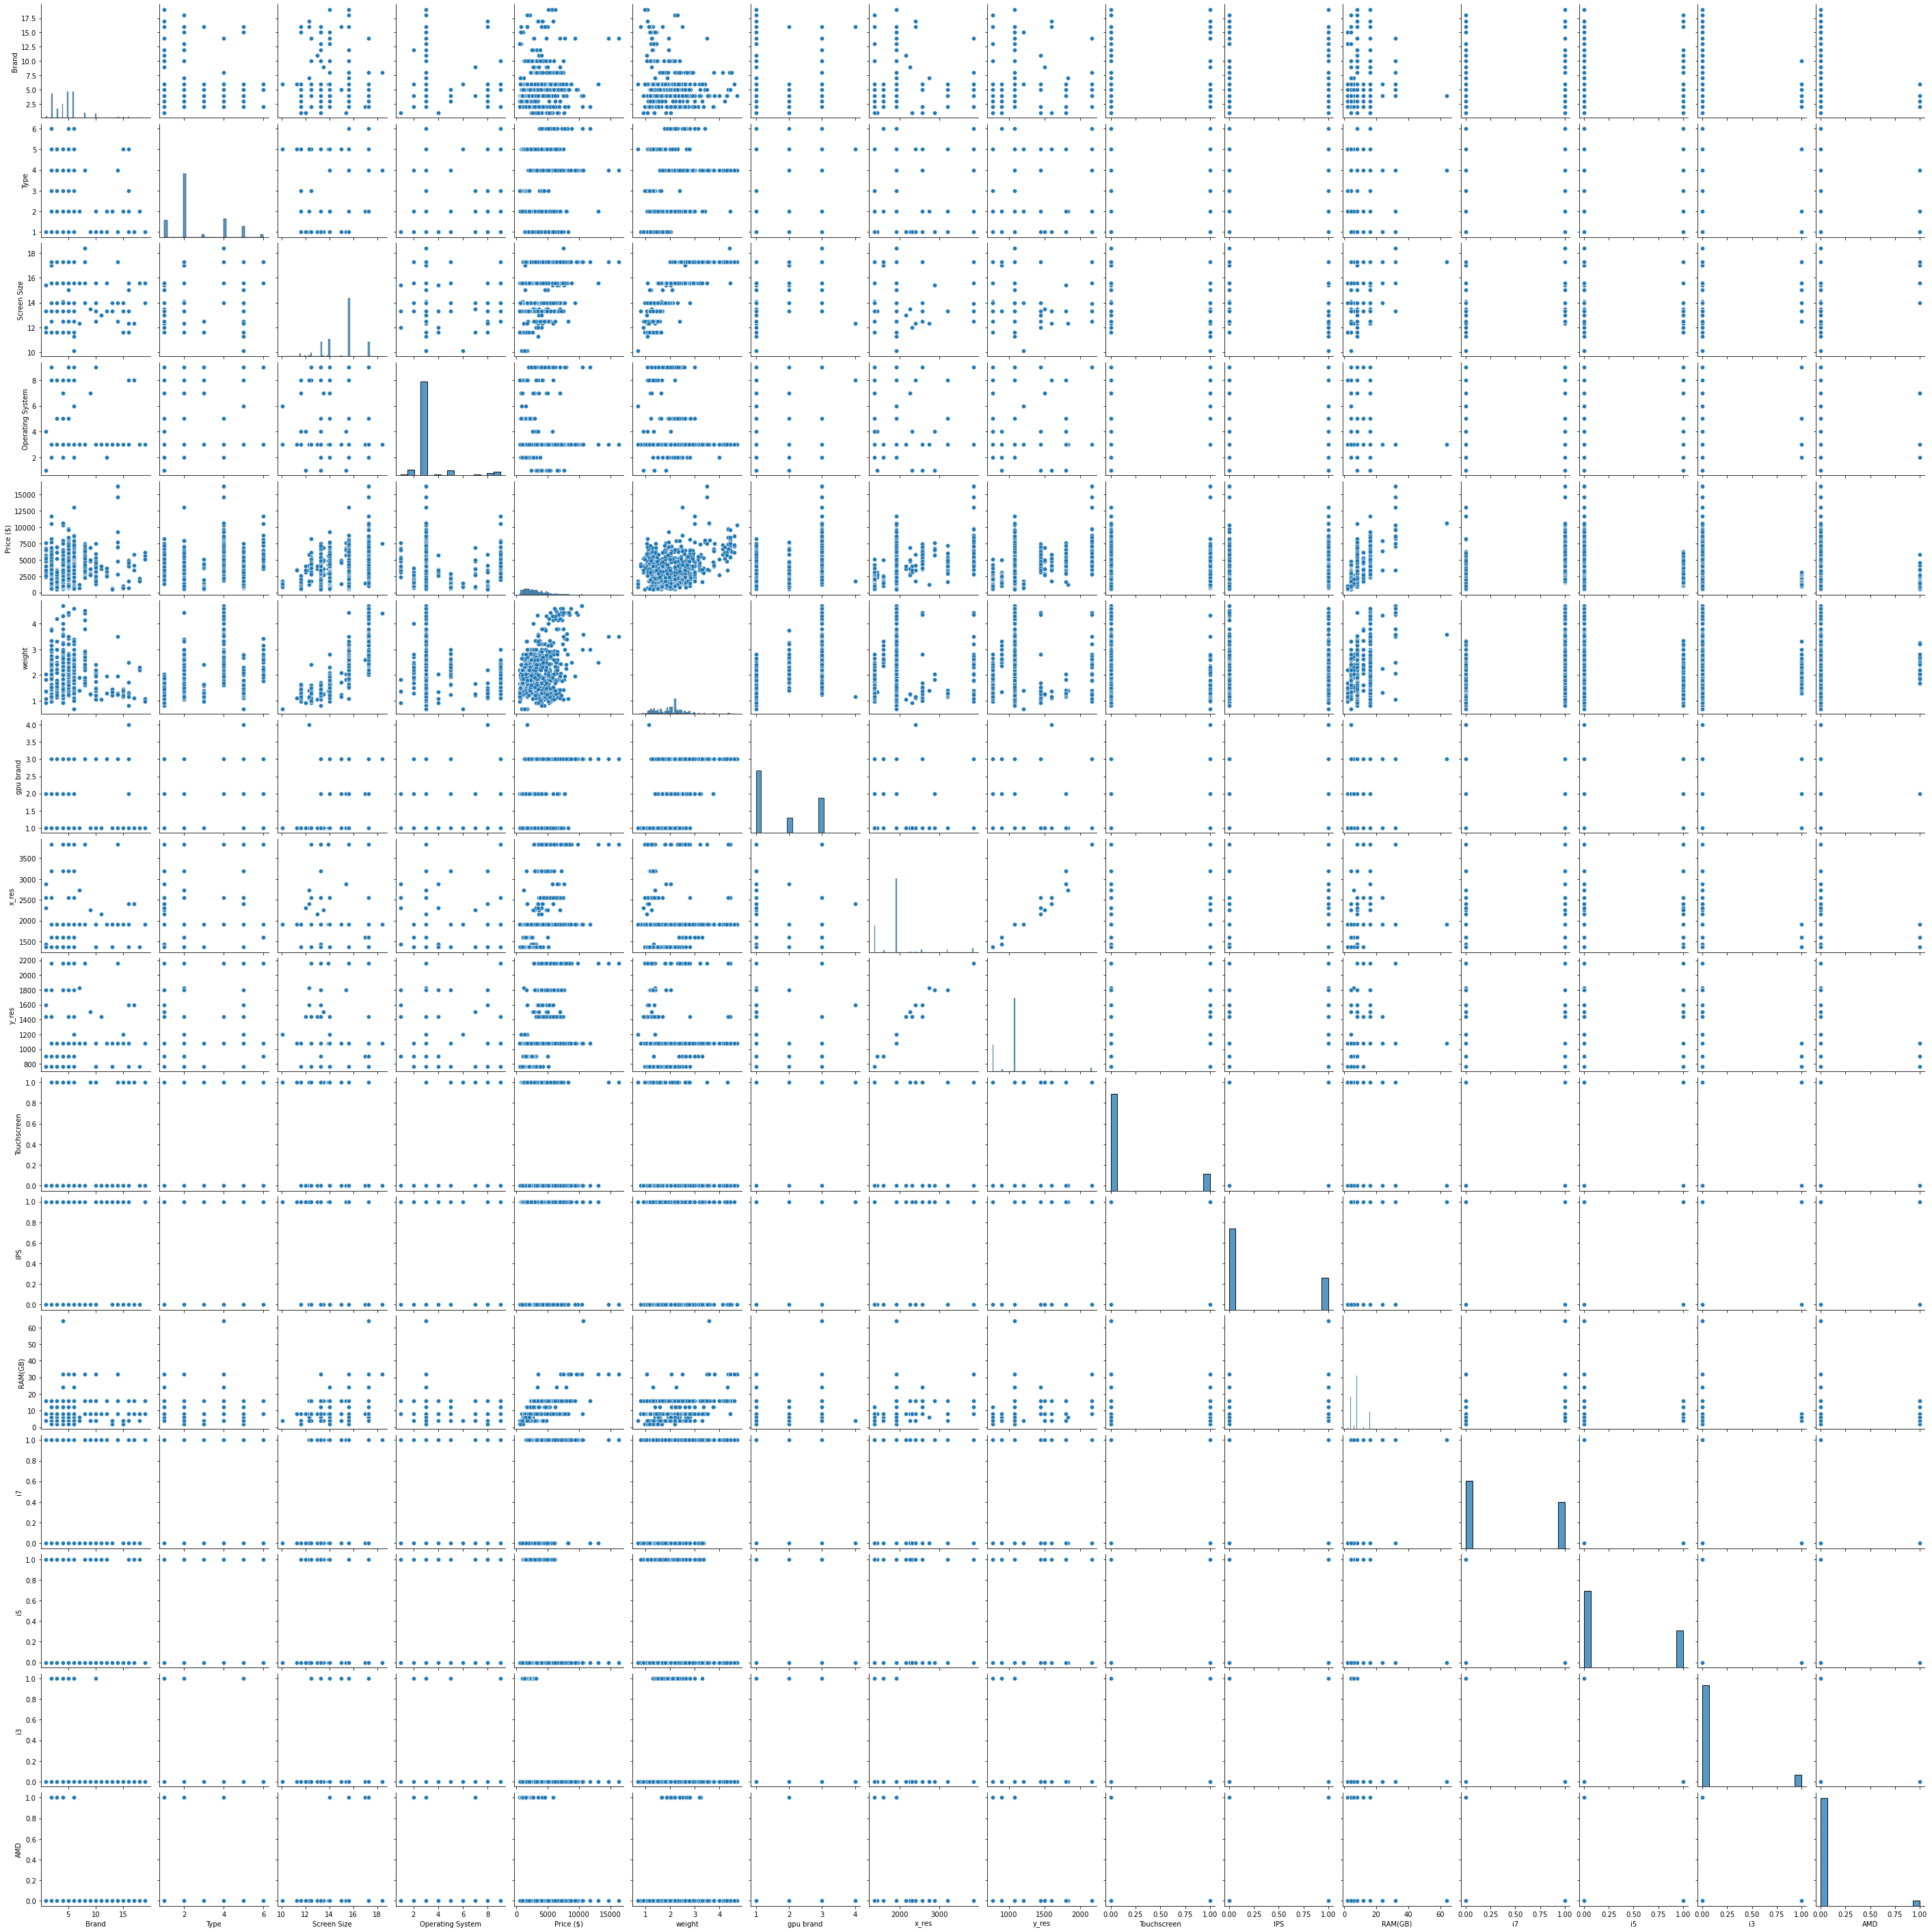

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df2)
plt.show()

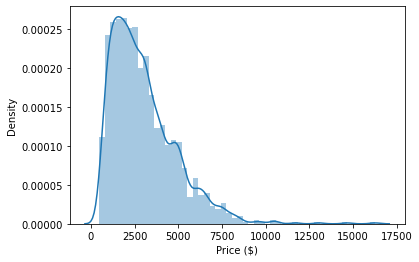

In [209]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df2['Price ($)'])
plt.show()

In [101]:
# taking the log of the price to transform to normal distribution so that the performance of the algorithm will increase. 

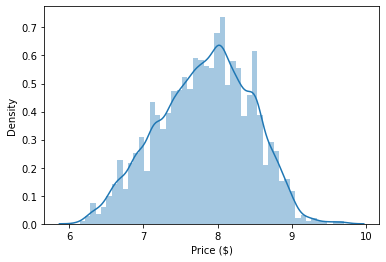

In [102]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(np.log(df2['Price ($)']))
plt.show()

<AxesSubplot:xlabel='weight', ylabel='Price ($)'>

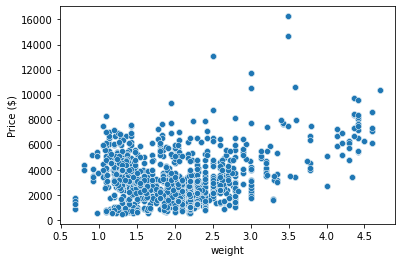

In [103]:
sns.scatterplot(data=df, x=df2['weight'], y=df2['Price ($)'])

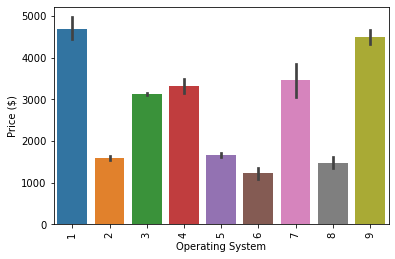

In [104]:
sns.barplot(x=df2['Operating System'],y=df2['Price ($)'])
plt.xticks(rotation='vertical')
plt.show()

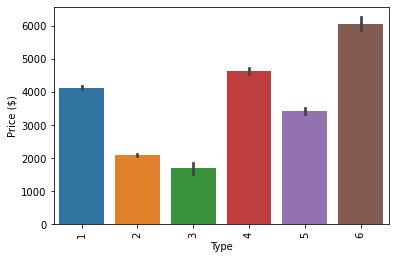

In [105]:
sns.barplot(x=df2['Type'],y=df2['Price ($)'])
plt.xticks(rotation='vertical')
plt.show()

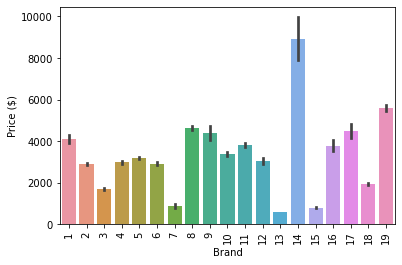

In [106]:
sns.barplot(x=df2['Brand'],y=df2['Price ($)'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='x_res', ylabel='Price ($)'>

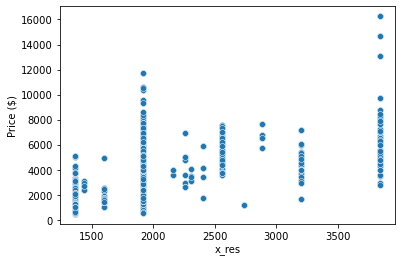

In [107]:
sns.scatterplot(data=df2, x=df2['x_res'], y=df2['Price ($)'])

<AxesSubplot:xlabel='y_res', ylabel='Price ($)'>

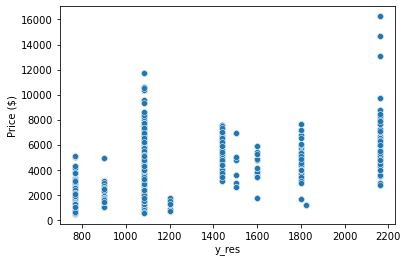

In [108]:
sns.scatterplot(data=df2, x=df2['y_res'], y=df2['Price ($)'])

<AxesSubplot:xlabel='Touchscreen', ylabel='Price ($)'>

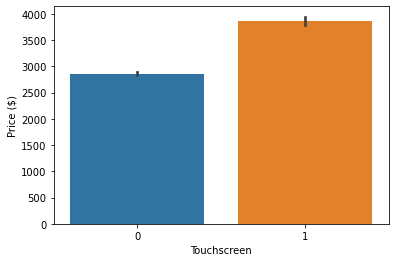

In [109]:
sns.barplot(x=df2['Touchscreen'],y=df2['Price ($)'])

<AxesSubplot:xlabel='IPS', ylabel='Price ($)'>

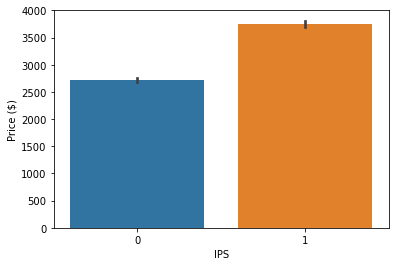

In [110]:
sns.barplot(x=df2['IPS'],y=df2['Price ($)'])

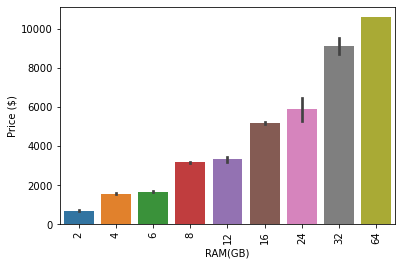

In [111]:
sns.barplot(x=df2['RAM(GB)'],y=df2['Price ($)'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='i5', ylabel='Price ($)'>

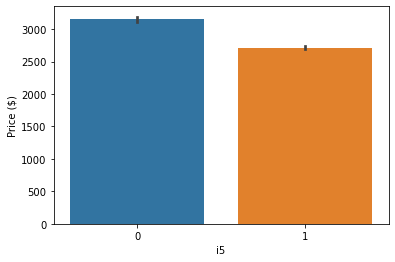

In [112]:
sns.barplot(x=df2['i5'],y=df2['Price ($)'])

<AxesSubplot:xlabel='i7', ylabel='Price ($)'>

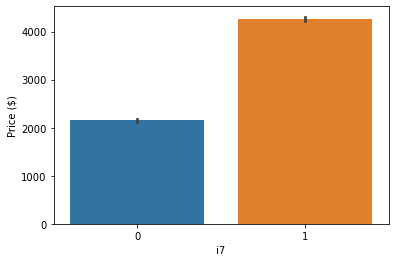

In [113]:
sns.barplot(x=df2['i7'],y=df2['Price ($)'])

<AxesSubplot:xlabel='i3', ylabel='Price ($)'>

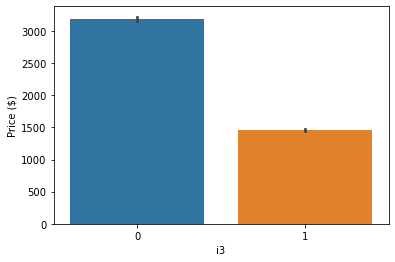

In [114]:
sns.barplot(x=df2['i3'],y=df2['Price ($)'])

<AxesSubplot:xlabel='AMD', ylabel='Price ($)'>

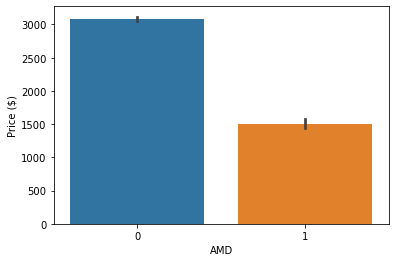

In [115]:
sns.barplot(x=df2['AMD'],y=df2['Price ($)'])

<AxesSubplot:xlabel='ssd', ylabel='Price ($)'>

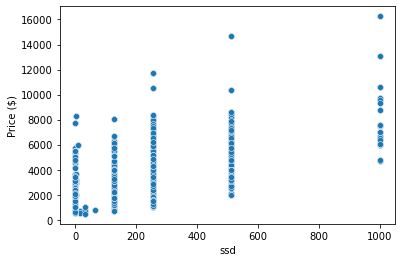

In [106]:
sns.scatterplot(data=df2, x=df2['ssd'], y=df2['Price ($)'])

In [107]:
df2.corr()['Price ($)'].sort_values(ascending=False)

Price ($)           1.000000
RAM(GB)             0.741561
i7                  0.555561
x_res               0.554456
y_res               0.550575
Type                0.296687
gpu brand           0.281155
IPS                 0.248608
weight              0.212998
Touchscreen         0.191837
Brand               0.150547
Screen Size         0.069650
Operating System    0.028163
i5                 -0.109186
AMD                -0.179428
i3                 -0.281951
Name: Price ($), dtype: float64

In [108]:
df2.head(4)

,Brand,Type,Screen Size,Operating System,Price ($),weight,gpu brand,x_res,y_res,Touchscreen,IPS,RAM(GB),i7,i5,i3,AMD,hdd,ssd,hybrid,flash_storage
0,1,1,13.3,1,3568.93416,1.37,1,2560,1600,0,1,8,0,1,0,0,0,128.0,0,0
1,1,1,13.3,1,2394.77616,1.34,1,1440,900,0,0,8,0,1,0,0,0,0,0,128.0
2,2,2,15.6,2,1531.80000,1.86,1,1920,1080,0,0,8,0,1,0,0,0,256.0,0,0
3,1,1,15.4,1,6759.76680,1.83,2,2880,1800,0,1,16,1,0,0,0,0,512.0,0,0


In [109]:
# However, I have already dropped all useless features and there are no more features to be dropped

In [110]:
y = np.log(df2['Price ($)'].values)
X = df2.drop('Price ($)',axis = 1).values

# MODEL SELECTION

In [148]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

## Linear Regression

In [114]:
# linear regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train , X_test , y_train , y_test = train_test_split (X, y ,test_size =0.3 , random_state = 42)
reg_all = LinearRegression( )
reg_all.fit(X_train , y_train )
y_pred = reg_all.predict(X_test )
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred)))

R^2: 0.7702193910328249
Root Mean Squared Error: 0.29995448097864963
Mean Squared Error: 0.08997269065917109


## Support Vector Regression

In [112]:
# Support Vector Regression
import numpy as np
from sklearn.svm import SVR
# fit a Support Vector Regression model to the data
X_train,X_test,y_train,y_test = train_test_split (X, y ,test_size =0.3 , random_state = 42,stratify )
svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
print((mean_squared_error(y_test,y_pred)))
print(svr.score(X_test,y_test))

0.14632307497181843
0.626306548946729


## Decision Tree Regression

In [132]:
Regression Tree
import numpy as np
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test = train_test_split (X, y ,test_size =0.3 , random_state = 42 )
# fit a Regression Tree model to the data
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print((mean_squared_error(y_test,y_pred)))
print(dt.score(X_test,y_test))


0.003751186560551147
0.9902433982097465


## Random Forest Regression

In [139]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split (X, y ,test_size =0.3 , random_state = 42 )
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print((mean_squared_error(y_test,y_pred)))
print(regr.score(X_test,y_test))

0.14924254404311793
0.611829470785068


In [132]:
# hyperparameter tuning on hold out set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

steps = [('scaler', StandardScaler()),
         ('DT', DecisionTreeRegressor())]

pipeline = Pipeline(steps)

params = {
    'DT__max_depth':  [2, 4, 6, 8, 10],
    'DT__min_samples_leaf': [0.04,0.06,0.08,0.1,0.12, 0.14, 0.16, 0.18],

}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt = GridSearchCV(pipeline,param_grid=params,cv=10)

dt.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = dt.predict(X_test)
r2 = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned Decision Tree param: {}".format(dt.best_params_))
print("Tuned Decision R^2: {}".format(r2))
print("Tuned Decision Tree MSE: {}".format(mse))

Tuned Decision Tree param: {'DT__max_depth': 8, 'DT__min_samples_leaf': 0.04}
Tuned Decision R^2: 0.7714682667024615
Tuned Decision Tree MSE: 0.08948368201392015


In [133]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt,X,y,cv=10)

array([0.77095341, 0.78214388, 0.77666642, 0.77634357, 0.76494086,
       0.77098119, 0.78213624, 0.77666736, 0.77632461, 0.76491585])

In [ ]:
the cross validation scores are  decently high indicating that the model perfroms well on unseen data but it is not too high 
and this might be due to overfitting

In [ ]:
# fitting in the best params

In [134]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=10,
                           min_samples_leaf=0.04,
                           random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

r2 = dt.score(X_test,y_test)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print("Test set MSE of dt: {:.2f}".format(mse_dt))
print("Test Set R^2 of dt: {}".format(r2))

Test set RMSE of dt: 0.30
Test set MSE of dt: 0.09
Test Set R^2 of dt: 0.7714682667024614


In [127]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = train_test_split (X, y ,test_size =0.3 , random_state = 42)
dummy_regr = DummyRegressor(strategy="mean").fit(X_train, y_train)
dummy_regr.score(X, y)
y_predict_dummy_regr = dummy_regr.predict(X_test)
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_regr)))

r2_score (dummy mean): -0.00


In [ ]:
# How well does your system compare to a stupid baseline
If comapred to the stupid, baseline, my model is preforming well. The r2 score after doing hypeparameter tuning is lower than
before tuning as it is no longer overfitted. The r2 score is 0.99 likely due ot overfitting. Hence, DecisionTreeRegressor is the
best model for this prediction task